# YZV311E Data Mining Project Data Preprocessing and Exploration

## Name : Yusuf Faruk Güldemir
## Student ID : 150210302

## Name : Hasan Taha Bağcı
## Student ID : 150210338

## -------------------------------

## Importing Libraries

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from utils.datapreprocess import *

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Reading Data and Exploring General Features of Data

In [109]:
df = pd.read_csv("data/application_record.csv")
record = pd.read_csv("data/credit_record.csv")

In [110]:
df.shape 

(438557, 18)

* 438557 rows and 18 columns

In [111]:
record.shape

(1048575, 3)

In [112]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [113]:
df.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

In [115]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,4.385570e+05,438557.000000,4.385570e+05,438557.000000,438557.000000,438557.0,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,-15997.904649,60563.675328,1.0,0.206133,0.287771,0.108207,2.194465
std,5.716370e+05,0.724882,1.100869e+05,4185.030007,138767.799647,0.0,0.404527,0.452724,0.310642,0.897207
min,5.008804e+06,0.000000,2.610000e+04,-25201.000000,-17531.000000,1.0,0.000000,0.000000,0.000000,1.000000
25%,5.609375e+06,0.000000,1.215000e+05,-19483.000000,-3103.000000,1.0,0.000000,0.000000,0.000000,2.000000
50%,6.047745e+06,0.000000,1.607805e+05,-15630.000000,-1467.000000,1.0,0.000000,0.000000,0.000000,2.000000
75%,6.456971e+06,1.000000,2.250000e+05,-12514.000000,-371.000000,1.0,0.000000,1.000000,0.000000,3.000000
max,7.999952e+06,19.000000,6.750000e+06,-7489.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000


In [116]:
record.isna().sum()

ID                0
MONTHS_BALANCE    0
STATUS            0
dtype: int64

In [117]:
record.columns

Index(['ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [118]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   ID              1048575 non-null  int64 
 1   MONTHS_BALANCE  1048575 non-null  int64 
 2   STATUS          1048575 non-null  object
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [119]:
record.STATUS.value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [120]:
record.MONTHS_BALANCE.value_counts()

-1     34436
-2     34209
 0     33856
-3     33854
-4     33365
       ...  
-56     2109
-57     1649
-58     1255
-59      820
-60      415
Name: MONTHS_BALANCE, Length: 61, dtype: int64

* We need to merge these 2 datasets by using "user_id" column as a key.

In [121]:
df = df.merge(record, on='ID', how='inner')

In [122]:
df.sample(5)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
535919,5104947,F,N,Y,3,67500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-16694,-412,1,1,1,0,Sales staff,5.0,-37,0
487965,5095266,F,Y,Y,0,126000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-10302,-734,1,0,0,0,Core staff,2.0,-44,C
372062,5067803,F,N,Y,0,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-19392,-121,1,0,1,0,NaN,1.0,-13,X
467173,5091658,F,N,Y,1,360000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-17106,-2849,1,0,0,0,Managers,3.0,-42,0
44468,5021481,F,N,Y,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-11905,-2470,1,0,1,1,Cooking staff,2.0,-4,C


#### Changing the columns lower names for better understanding

In [123]:
df.columns = df.columns.str.lower()

#### Getting Categoric and Numeric Features

In [124]:
categorical_features = []
numerical_features = []
for col in df.columns:
    iscategoric = isCategorical(df, col, threshold=10)
    isnumeric = isNumerical(df, col)
    print("Column : ", col)
    print("Number of unique values: ", df[col].nunique(), "- Is it categorical : ", iscategoric)
    if iscategoric:
        categorical_features.append(col)
    if isnumeric:
        numerical_features.append(col)


print("Categorical features : ", categorical_features)
print("Numerical features : ", numerical_features)

Column :  id
Number of unique values:  36457 - Is it categorical :  False
Column :  code_gender
Number of unique values:  2 - Is it categorical :  True
Column :  flag_own_car
Number of unique values:  2 - Is it categorical :  True
Column :  flag_own_realty
Number of unique values:  2 - Is it categorical :  True
Column :  cnt_children
Number of unique values:  9 - Is it categorical :  True
Column :  amt_income_total
Number of unique values:  265 - Is it categorical :  False
Column :  name_income_type
Number of unique values:  5 - Is it categorical :  True
Column :  name_education_type
Number of unique values:  5 - Is it categorical :  True
Column :  name_family_status
Number of unique values:  5 - Is it categorical :  True
Column :  name_housing_type
Number of unique values:  6 - Is it categorical :  True
Column :  days_birth
Number of unique values:  7183 - Is it categorical :  False
Column :  days_employed
Number of unique values:  3640 - Is it categorical :  False
Column :  flag_mobi

#### Information about Missing Values

In [93]:
df.isna().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
MONTHS_BALANCE              0
STATUS                      0
dtype: int64

* It is seen that there are missing values only Occupation Type column.

#### Correlation Matrix of Data

<AxesSubplot:>

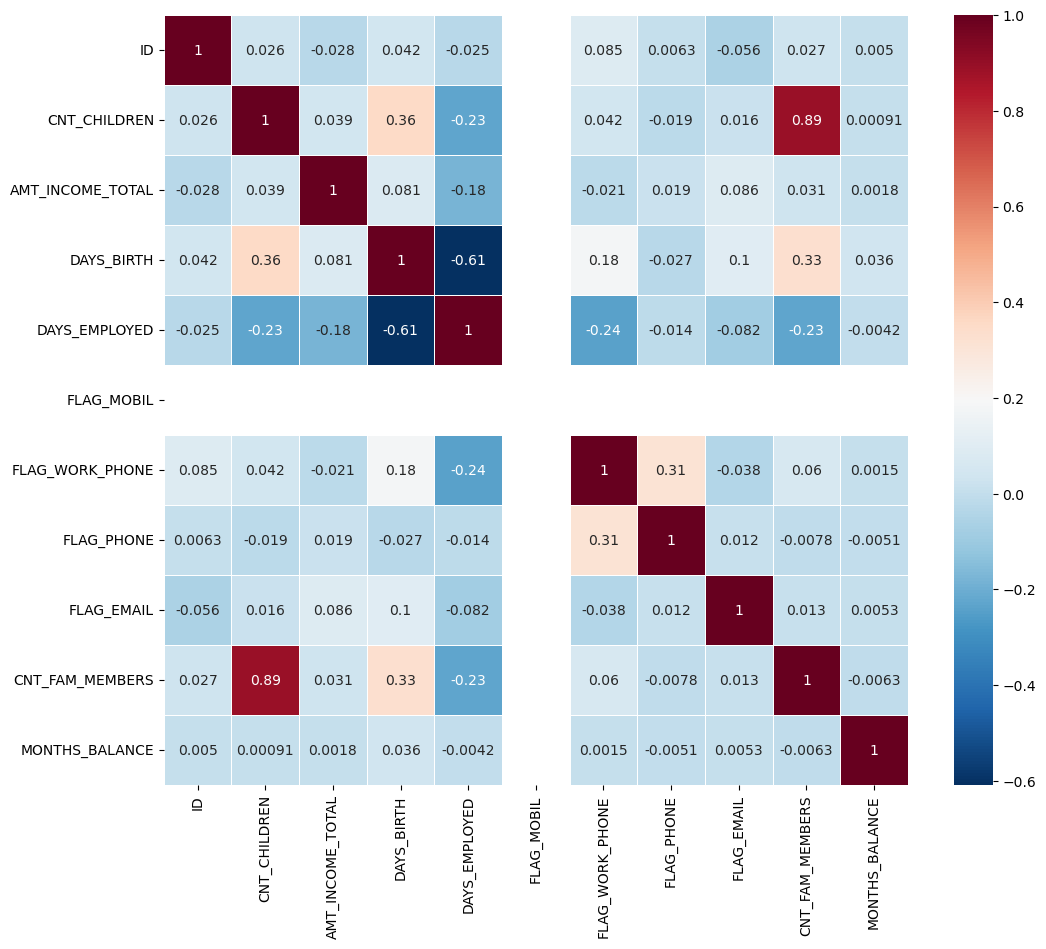

In [94]:
# Correlation matrix
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)


## Data Preprocessing

### Closer Look to Occupation Type Column

Laborers                 131572
Core staff                77112
Sales staff               70362
Managers                  67738
Drivers                   47678
High skill tech staff     31768
Accountants               27223
Medicine staff            26691
Cooking staff             13416
Security staff            12400
Cleaning staff            11399
Private service staff      6714
Low-skill Laborers         3623
Secretaries                3149
Waiters/barmen staff       2557
HR staff                   1686
IT staff                   1319
Realty agents              1260
Name: occupation_type, dtype: int64


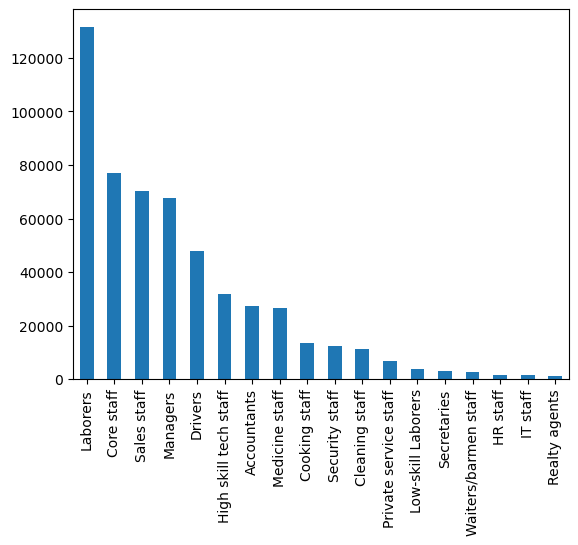

In [98]:
print(df["occupation_type"].value_counts())

df["occupation_type"].value_counts().plot(kind='bar')
plt.show()

In [99]:
df["occupation_type"].isna().sum()

240048

#### Filling Missing Values of Occupation Type Column with "Unknown" Value

In [100]:
df["occupation_type"].fillna("Unknown", inplace=True)